**Project title : Heart Failure Prediction**

**Objective:**

The main aim of this project is to develop a predictive model for heart disease using patient data and to identify key risk factors through exploratory data analysis (EDA), also help with early detection and treatment of heart diseases.

In [2]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


!pip install category-encoders
import category_encoders as ce
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
!pip install xgboost
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.6 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/My Drive/Kaggle projects/Heart Failure Prediction')

**Data Loading**

In [5]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Data Exploration**

In [ ]:
print(df.shape)
df.info()

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


**Exploratory Data Analysis**

HeartDisease
1    508
0    410
Name: count, dtype: int64


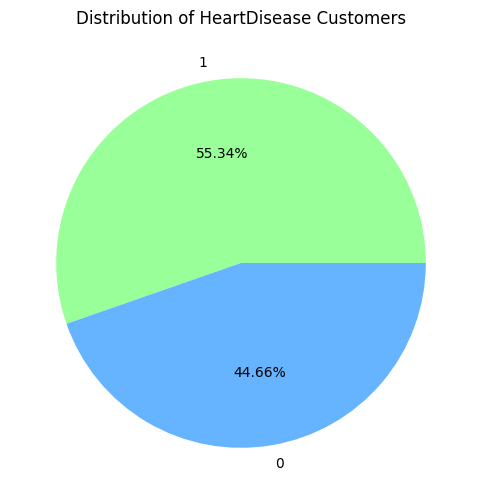

In [ ]:
#univariant analysis
#exploring target variable
plt.figure(figsize=(6, 6))
churn_counts = df['HeartDisease'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.2f%%', colors=['#99ff99', '#66b3ff'])
plt.title('Distribution of HeartDisease Customers')
print(df['HeartDisease'].value_counts())
plt.show()

By observing Heart disease distribution plot, there are more patients with heart diseases.

In [ ]:
# filtering categorical data
df_categorical=df[['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']]
print(df_categorical.shape)
df_categorical.head()

(918, 6)


,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,0,Normal,N,Up
1,F,NAP,0,Normal,N,Flat
2,M,ATA,0,ST,N,Up
3,F,ASY,0,Normal,Y,Flat
4,M,NAP,0,Normal,N,Up


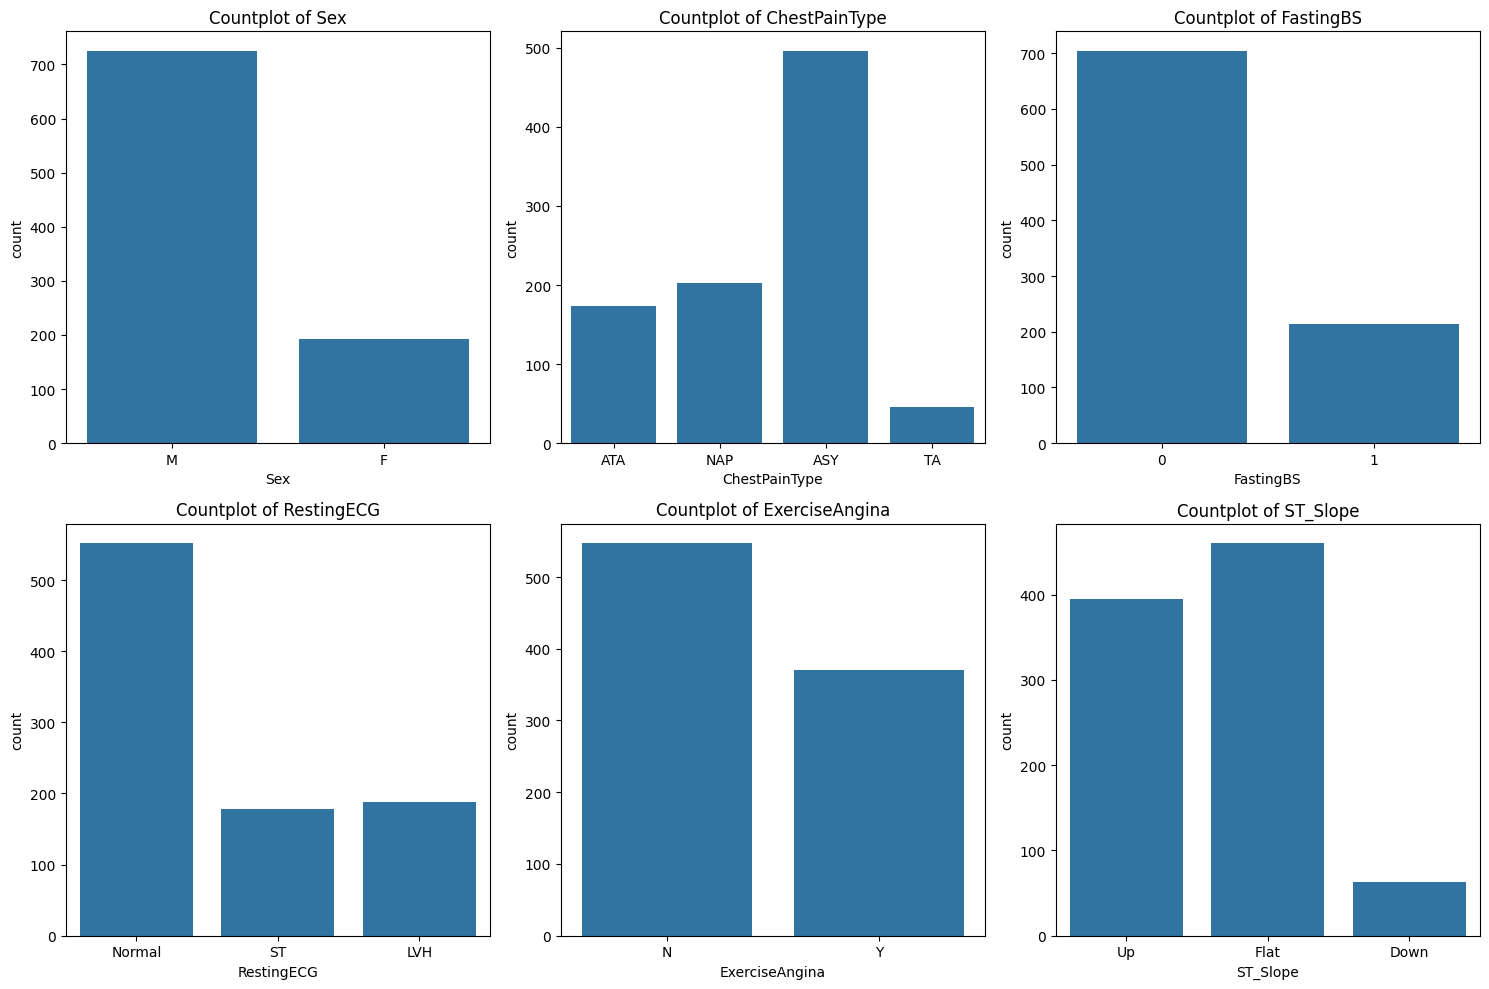

In [ ]:
# Distributions of categorical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(df_categorical.columns):
    sns.countplot(x=col, data=df_categorical, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.savefig('uni_cat.png', dpi=300, bbox_inches='tight')
plt.show()

The dataset consists mostly of Males compared to females. Most patients experience Asymptomatic(ASY) ChestPain and second category is (NAP) Non-Anginal Pain. Most of the patients sugar levels are nomal, implying less prevalence of diabetes in the dataset. Majority of the patient shows Resting electrocardiogram(ECG) results are normal, while ST & LVH shows smaller portion. Most of the individuals having higher portion with No ExerciseAngina which is a favorable sign

In [ ]:
# filtering numerical features
df_numerical=df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']]
print(df_numerical.shape)
df_numerical.head()

(918, 5)


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


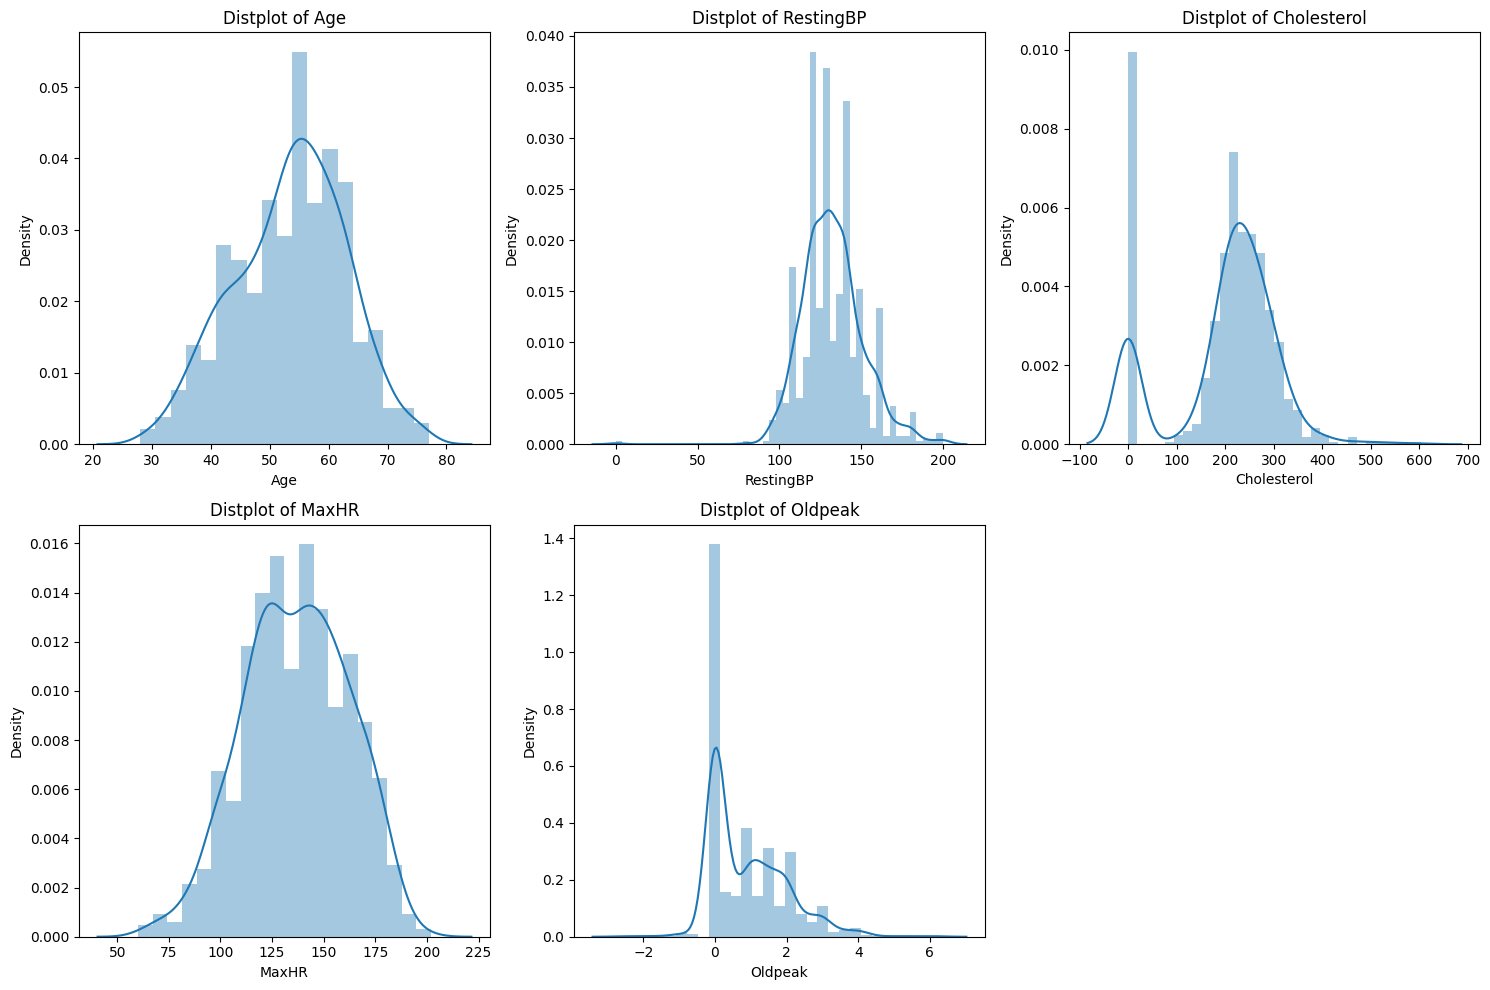

In [ ]:
# Distributions of numerical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(df_numerical.columns):
    sns.distplot(df_numerical[col], ax=axes[i])
    axes[i].set_title(f'Distplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('uni_num.png', dpi=300, bbox_inches='tight')
plt.show()

The distribution of age plot shows that most of the individuals are between 40-60 years. The distribution of RestingBP centers around 120-140 mmHg. Most of the individuals having Cholesterol levels between 200-300 mg/dl. Maximum HeartRate is near 140-160 bpm. The Oldpeak distribution plot shows most values are 0.

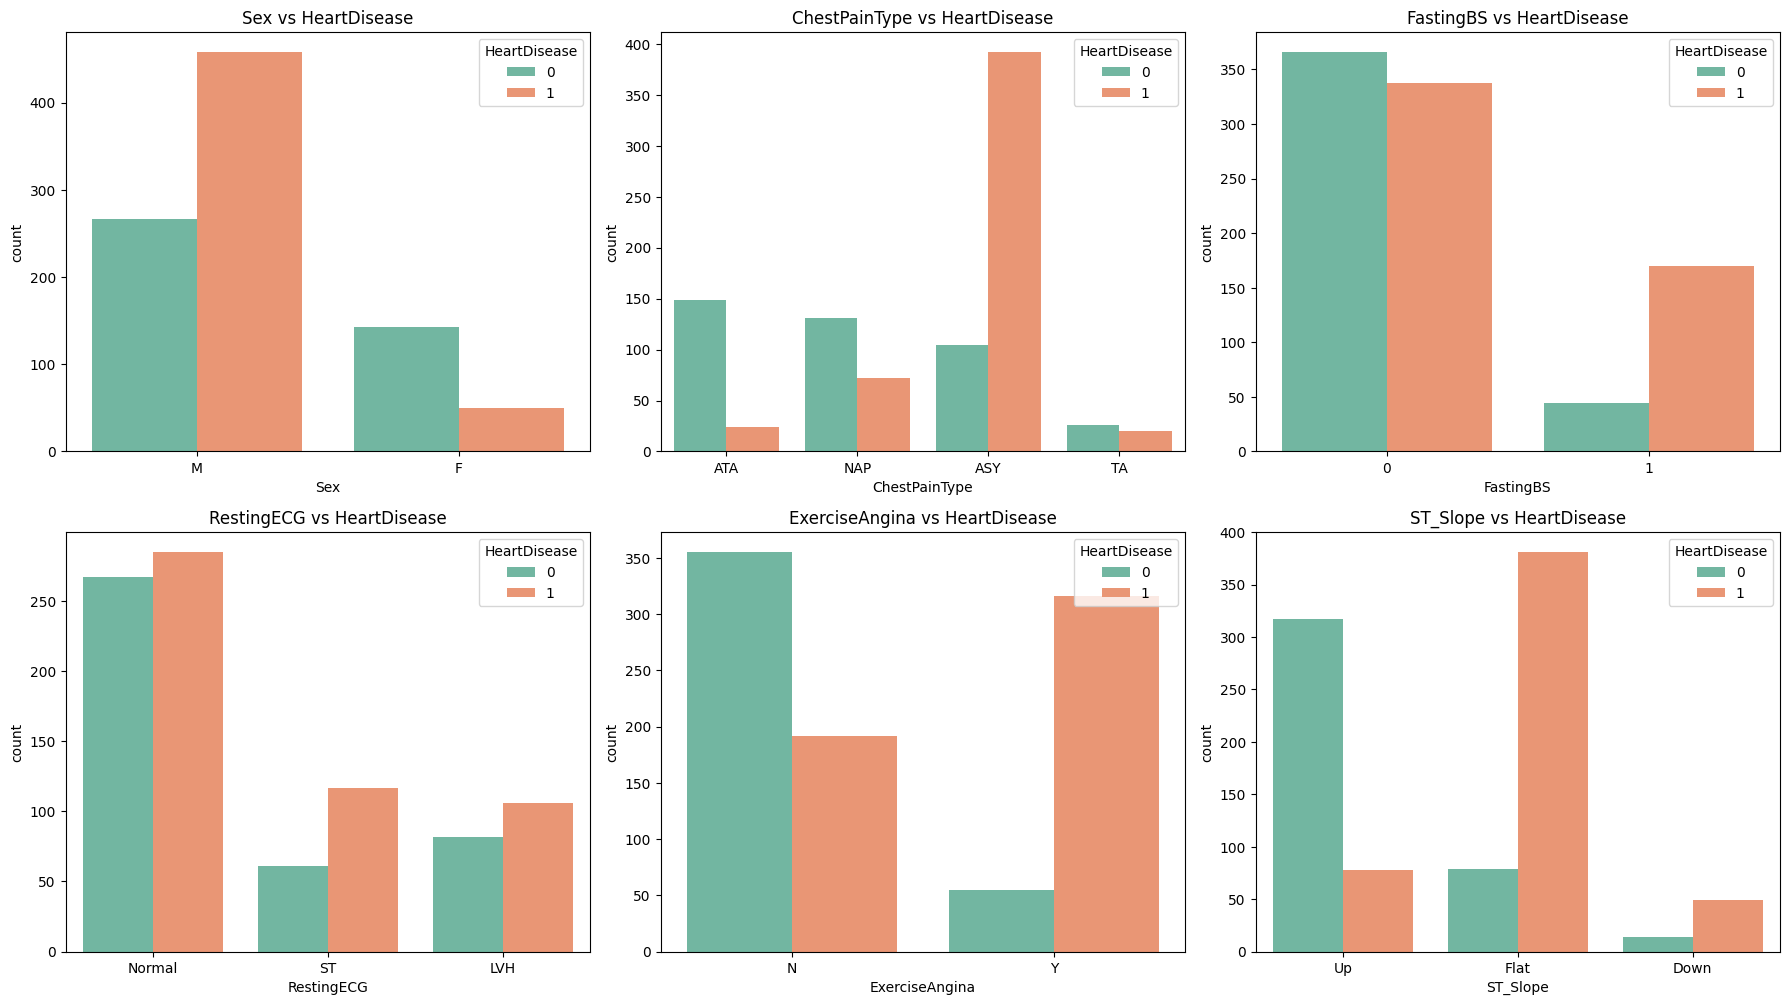

In [ ]:
#Bivariant analysis - categorical Vs Target variable
n_cols = 3
n_rows = (len(df_categorical) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(df_categorical):
    sns.countplot(data=df, x=feature, hue='HeartDisease', palette='Set2', ax=axes[i])
    axes[i].set_title(f'{feature} vs HeartDisease')
    axes[i].legend(title='HeartDisease', loc='upper right')

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('Bi_cat.png', dpi=300, bbox_inches='tight')
plt.show()

Most of the Male patients having Heart diseases compared to female patients. Individuals with ASY chestpain having more heart disease and less in TA. Individuals with ST abnormalities or left ventricular hypertrophy are more likely to have heart disease. More Patients reporting ExerciseAngima 'Y' with heart disease.Flat ST slope correlates with heart disease, while Upsloping correlates with no heart disease.

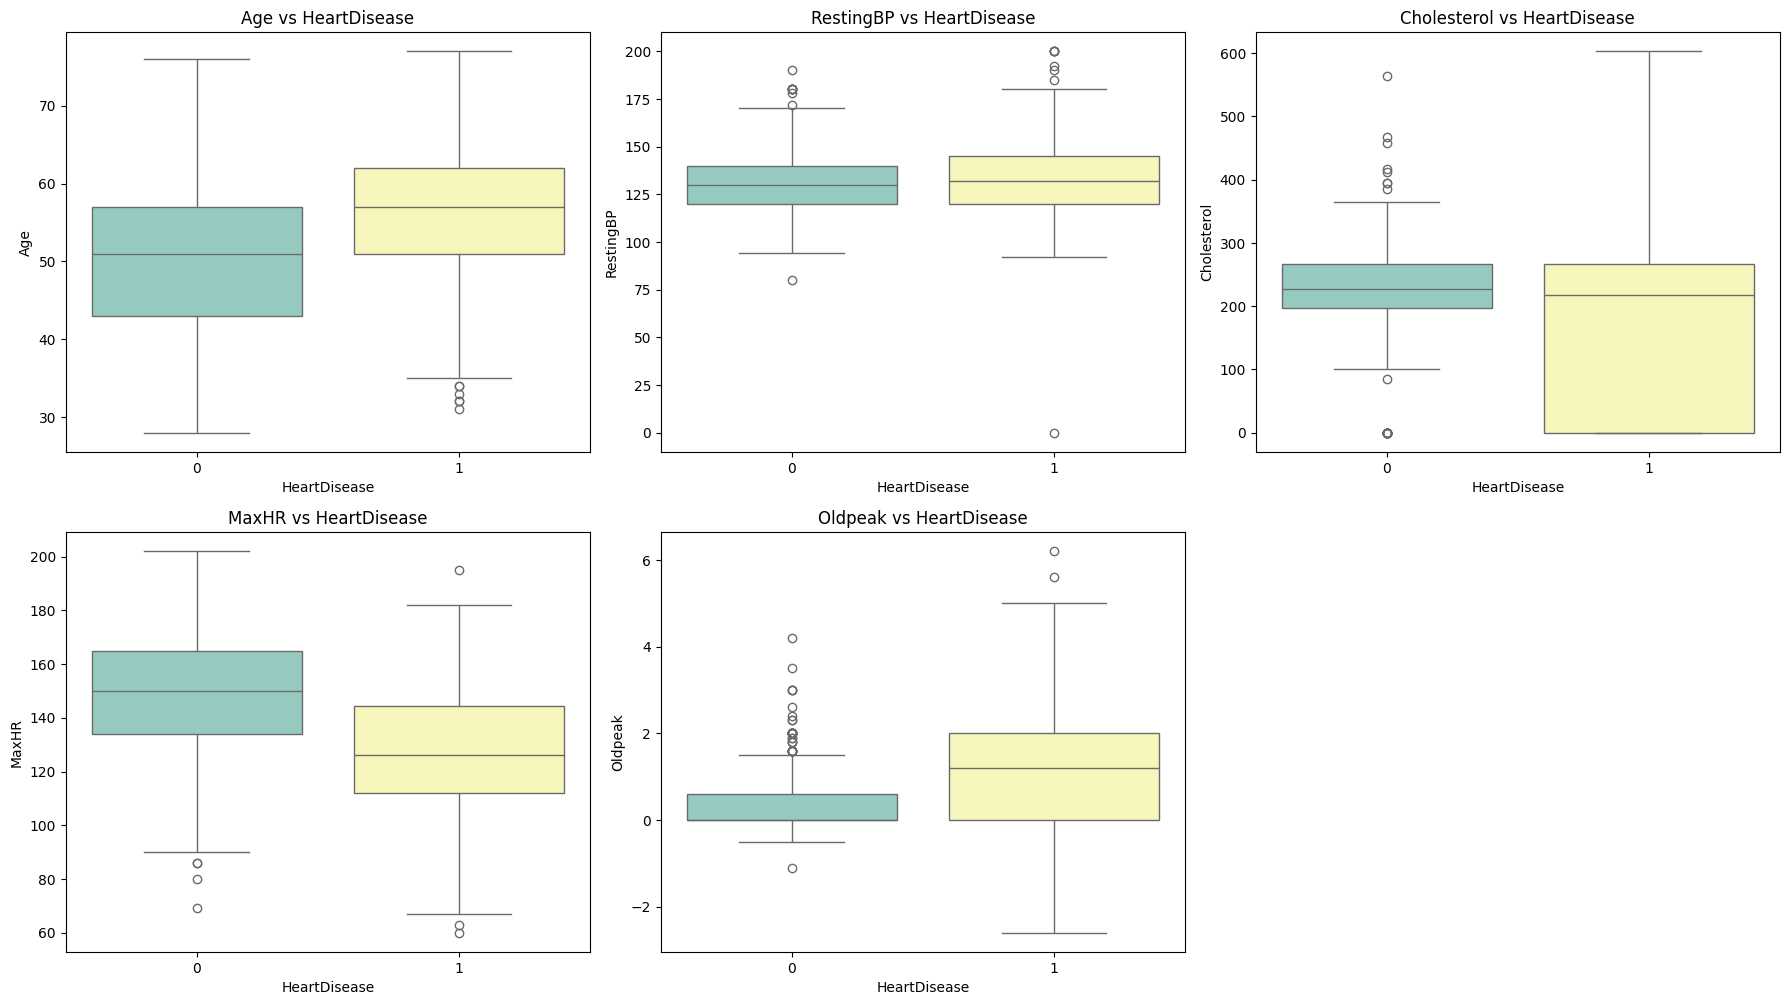

In [ ]:
#Bivariant analysis - Numerica Vs Target variable

n_cols = 3
n_rows = (len(df_numerical) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(df_numerical):
    sns.boxplot(data=df, x='HeartDisease', y=feature, palette='Set3', ax=axes[i])
    axes[i].set_title(f'{feature} vs HeartDisease')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('Bi_numeric.png', dpi=300, bbox_inches='tight')

plt.show()

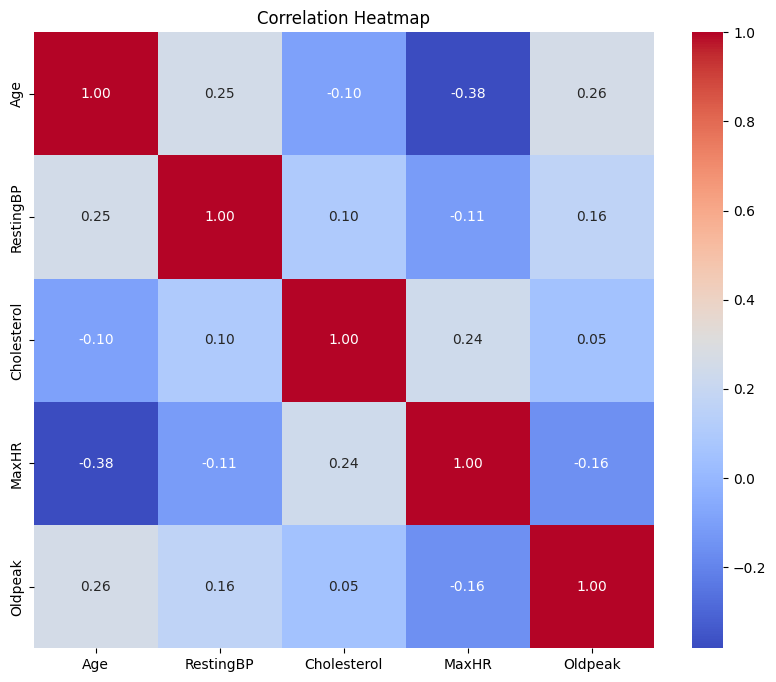

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('cor.png', dpi=300, bbox_inches='tight')

plt.show()


**Insights**

- Gender (male), asymptomatic chest pain, exercise-induced angina, flat ST slope, and higher cholesterol are strong indicators of heart disease.

- Numerical variables such as lower MaxHR and higher Oldpeak also correlate significantly with heart disease.


**Modelling**

In [6]:
X=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

#split data into training & testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, train_size=0.80, random_state=42)

print(df.shape)
print(X_train.shape)
print(X_test.shape)

(918, 12)
(734, 11)
(184, 11)


In [7]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [43]:
#Logistic Regression

LR_model = LogisticRegression(solver='liblinear') #just for practice i used Gridsearch algorithm to select best parameters
LR_model.fit(X_train,y_train)
LR_pred = LR_model.predict(X_test)
print(classification_report(y_test, LR_pred))
print(confusion_matrix(y_test,LR_pred))
#LR_model.get_params()


              precision    recall  f1-score   support

           0       0.75      0.83      0.79        77
           1       0.87      0.80      0.83       107

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184

[[64 13]
 [21 86]]


In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)


{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [50]:
#Decision Tree
DT_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2 )
DT_model.fit(X_train, y_train)
y_pred=DT_model.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        77
           1       0.89      0.89      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

[[65 12]
 [12 95]]


In [48]:
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [74]:
#Random Forest
RandomForest_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

RandomForest_classifier.fit(X_train, y_train)
y_pred = RandomForest_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

[[66 11]
 [12 95]]


In [63]:
#XGBoost
xgb_Classifier = xgb.XGBClassifier()
xgb_Classifier = xgb_Classifier.fit(X_train, y_train)

y_pred = xgb_Classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

[[67 10]
 [14 93]]


In [64]:
#GradientBoosting
gbm = GradientBoostingClassifier()

# Train the model
gbm.fit(X_train, y_train)

y_pred_gbm = gbm.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred_gbm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gbm))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184


Confusion Matrix:
 [[68  9]
 [14 93]]


In [79]:
#AdaBoost
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

# Make predictions
y_pred = ada_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184


Confusion Matrix:
 [[68  9]
 [17 90]]


In [81]:
#KNN
KNN_Classifier = KNeighborsClassifier()
KNN_Classifier.fit(X_train, y_train)
y_pred = KNN_Classifier.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.67        77
           1       0.77      0.70      0.74       107

    accuracy                           0.71       184
   macro avg       0.70      0.71      0.70       184
weighted avg       0.71      0.71      0.71       184


Confusion Matrix:
 [[55 22]
 [32 75]]


In [83]:
#SVM
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
y_pred = SVC_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.70      0.65        77
           1       0.76      0.67      0.71       107

    accuracy                           0.68       184
   macro avg       0.68      0.69      0.68       184
weighted avg       0.69      0.68      0.69       184


Confusion Matrix:
 [[54 23]
 [35 72]]


**Conclusion:**

EDA identified significant risk factors such as chest pain type, exercise-induced angina, ST slope, and Oldpeak, providing valuable insights into heart disease patterns. Machine learning models were developed, with Random Forest and Gradient Boosting achieved the highest accuracies with 88%. These models demonstrate strong potential for reliable heart disease prediction, supporting early diagnosis and improving patient outcomes.